no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L1Ap5_22-1-36/Track1.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L1Ap5_22-1-36/Track1.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L1Ap5_4-1-289/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L1Ap5_9-1-32/Track3.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Val/L5Jn0_4-1-257/Track5.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L5Jn0_5-1-211/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L6Jn0_10-1-281/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Val/L6Jn0_13-1-145/Track6.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L6Jn0_8-1-158/Track4.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/L6Jn0_8-1-159/Track4.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Val/R1Ap5_10-1-12/Track3.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/R1Ap5_18-1-205/Track1.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Train/R1Ap5_23-1-272/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Test/R1Ap5_28-1-40/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis/GT/Test/R1Ap5_8-1-21/Track3.png

have track1 empty and it actually has only 2 tracks

# Explore the dataset and visualize the raw images and labels

In [1]:
# libraries imports
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import time
import cv2

## Walk through the data directory

In [2]:
# navigate to the data sirectory
current_dir = "/content/drive/MyDrive/Thesis_Organized/Data"
os.chdir(current_dir)

In [3]:
# directory of the data folder
data_path = "./Original Images"

In [4]:
# Walk through the data directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

There are 3 directories and 1 files in './Original Images'.
There are 0 directories and 100 files in './Original Images/Test'.
There are 0 directories and 100 files in './Original Images/Val'.
There are 0 directories and 800 files in './Original Images/Train'.


The files are all images except in the main directory the 5 files are the XML labels and .DS_Store that we can ignore and 3 .txt files having the image names for each folder

## Visualize random images

In [5]:
def view_random_image(target_dir, target_folder):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_folder

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  title = random_image[0]
  plt.imshow(img)
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (517, 658, 4)


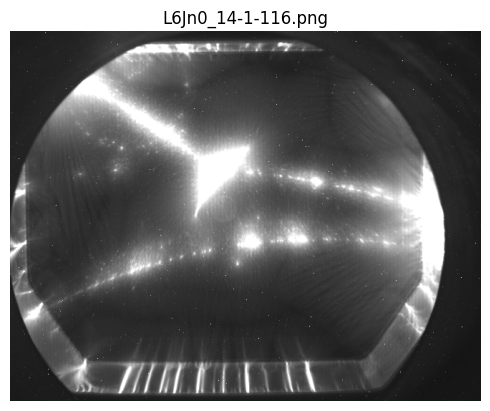

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir = data_path,
                        target_folder="/Train")

In [7]:
img[:,:,3]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

The image has 4 channels where the last channel is all filled with 1. Also the images are in float32 that will speed up the processing significantly

In [8]:
img.shape

(517, 658, 4)

Image shape: (517, 658, 4)
Image shape: (517, 658, 4)
Image shape: (517, 658, 4)


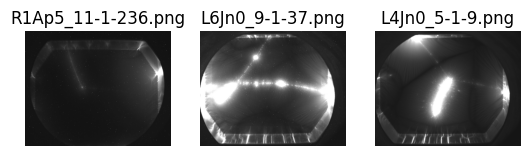

In [9]:
# Visualizing more images
plt.figure()
plt.subplot(1, 3, 1)
train_img = view_random_image(target_dir = data_path,
                        target_folder="/Train")
plt.subplot(1, 3, 2)
pizza_img = view_random_image(target_dir = data_path,
                        target_folder="/Test")
plt.subplot(1, 3, 3)
pizza_img = view_random_image(target_dir = data_path,
                        target_folder="/Val")

## Going through the labels

### Transforming the labels into a pandas dataframe

In [10]:
import xml.etree.ElementTree as et

xtree = et.parse(os.path.join(data_path, "annotations.xml"))
xroot = xtree.getroot()

In [11]:
xroot

<Element 'annotations' at 0x7dc5da330090>

In [12]:
for image in xroot:
  for track in image:
    s_name = track.attrib.get("points")
    print(s_name)
  break

411.65,248.47;312.63,149.45;223.32,36.45
384.92,256.98;339.97,263.66;406.79,249.08


In [13]:
annotations_dict = {"id":[], "name":[], "track":[], "occluded":[], "source":[], "z_order":[], "points":[]}
for image in xroot:
  for track in image:
    annotations_dict["id"].append(image.attrib.get("id"))
    annotations_dict["name"].append(image.attrib.get("name"))
    annotations_dict["track"].append(track.attrib.get("label"))
    annotations_dict["occluded"].append(track.attrib.get("occluded"))
    annotations_dict["source"].append(track.attrib.get("source"))
    annotations_dict["z_order"].append(track.attrib.get("z_order"))
    annotations_dict["points"].append(track.attrib.get("points"))

In [14]:
annotations_df = pd.DataFrame(annotations_dict)
annotations_df

,id,name,track,occluded,source,z_order,points
0,0,L1Ap5_1-1-109.png,Traccia2,0,manual,0,"411.65,248.47;312.63,149.45;223.32,36.45"
1,0,L1Ap5_1-1-109.png,Traccia3,0,manual,0,"384.92,256.98;339.97,263.66;406.79,249.08"
2,1,L1Ap5_1-1-142.png,Traccia1,0,manual,0,"567.18,283.10;495.49,275.20;440.15,264.27"
3,1,L1Ap5_1-1-142.png,Traccia2,0,manual,0,"316.88,223.56;243.37,181.04;130.37,128.18"
4,1,L1Ap5_1-1-142.png,Traccia3,0,manual,0,"364.27,251.51;356.98,269.74;347.26,291.61"
...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,manual,0,"545.80,264.17;514.83,177.58;492.08,86.57"
3045,998,R1Ap5_9-1-80.png,Traccia3,0,manual,0,"541.38,270.49;478.17,288.82;399.80,306.51"
3046,999,R1Ap5_9-1-81.png,Traccia1,0,manual,0,"519.26,269.22;330.91,239.52;174.17,244.58"
3047,999,R1Ap5_9-1-81.png,Traccia2,0,manual,0,"160.90,245.21;133.72,244.58;102.12,247.10"


In [15]:
np.unique(annotations_df.occluded.values), np.unique(annotations_df.source.values), np.unique(annotations_df.z_order.values), np.unique(annotations_df.track.values)

(array(['0'], dtype=object),
 array(['manual'], dtype=object),
 array(['-1', '0'], dtype=object),
 array(['Traccia1', 'Traccia10', 'Traccia2', 'Traccia3', 'Traccia4',
        'Traccia5', 'Traccia6', 'Traccia7', 'Traccia8', 'Traccia9'],
       dtype=object))

since we have only one value occluded and source we can simply drop them, and we have at most 10 tracks

In [16]:
annotations_df.drop(columns = ["occluded", "source"], inplace = True)
annotations_df

,id,name,track,z_order,points
0,0,L1Ap5_1-1-109.png,Traccia2,0,"411.65,248.47;312.63,149.45;223.32,36.45"
1,0,L1Ap5_1-1-109.png,Traccia3,0,"384.92,256.98;339.97,263.66;406.79,249.08"
2,1,L1Ap5_1-1-142.png,Traccia1,0,"567.18,283.10;495.49,275.20;440.15,264.27"
3,1,L1Ap5_1-1-142.png,Traccia2,0,"316.88,223.56;243.37,181.04;130.37,128.18"
4,1,L1Ap5_1-1-142.png,Traccia3,0,"364.27,251.51;356.98,269.74;347.26,291.61"
...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,"545.80,264.17;514.83,177.58;492.08,86.57"
3045,998,R1Ap5_9-1-80.png,Traccia3,0,"541.38,270.49;478.17,288.82;399.80,306.51"
3046,999,R1Ap5_9-1-81.png,Traccia1,0,"519.26,269.22;330.91,239.52;174.17,244.58"
3047,999,R1Ap5_9-1-81.png,Traccia2,0,"160.90,245.21;133.72,244.58;102.12,247.10"


Now to make it structured better we will create a column for each point

In [17]:
coordinates = annotations_df.apply(lambda x: x.points.split(";"), axis = 1).apply(lambda y: [y[0].split(","), y[1].split(","), y[2].split(",")])
coordinates

0       [[411.65, 248.47], [312.63, 149.45], [223.32, ...
1       [[384.92, 256.98], [339.97, 263.66], [406.79, ...
2       [[567.18, 283.10], [495.49, 275.20], [440.15, ...
3       [[316.88, 223.56], [243.37, 181.04], [130.37, ...
4       [[364.27, 251.51], [356.98, 269.74], [347.26, ...
                              ...                        
3044    [[545.80, 264.17], [514.83, 177.58], [492.08, ...
3045    [[541.38, 270.49], [478.17, 288.82], [399.80, ...
3046    [[519.26, 269.22], [330.91, 239.52], [174.17, ...
3047    [[160.90, 245.21], [133.72, 244.58], [102.12, ...
3048    [[157.74, 250.26], [152.05, 260.38], [145.73, ...
Length: 3049, dtype: object

In [18]:
coordinates[0]

[['411.65', '248.47'], ['312.63', '149.45'], ['223.32', '36.45']]

In [19]:
annotations_df.drop(columns = ["points"], inplace = True)

In [20]:
annotations_df.loc[:, ["p1_x", "p1_y", "p2_x", "p2_y", "p3_x", "p3_y"]] = np.ones((annotations_df.shape[0], 6)) * -1
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y
0,0,L1Ap5_1-1-109.png,Traccia2,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0,L1Ap5_1-1-109.png,Traccia3,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,L1Ap5_1-1-142.png,Traccia1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,L1Ap5_1-1-142.png,Traccia2,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,L1Ap5_1-1-142.png,Traccia3,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3045,998,R1Ap5_9-1-80.png,Traccia3,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3046,999,R1Ap5_9-1-81.png,Traccia1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3047,999,R1Ap5_9-1-81.png,Traccia2,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [21]:
np.float32(coordinates[0][0][0]).round(2)

411.65

In [22]:
for i in range(len(annotations_df)):
  annotations_df.loc[i, "p1_x"] = np.float32(coordinates[i][0][0])
  annotations_df.loc[i, "p1_y"] = np.float32(coordinates[i][0][1])
  annotations_df.loc[i, "p2_x"] = np.float32(coordinates[i][1][0])
  annotations_df.loc[i, "p2_y"] = np.float32(coordinates[i][1][1])
  annotations_df.loc[i, "p3_x"] = np.float32(coordinates[i][2][0])
  annotations_df.loc[i, "p3_y"] = np.float32(coordinates[i][2][1])

annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y
0,0,L1Ap5_1-1-109.png,Traccia2,0,411.649994,248.470001,312.630005,149.449997,223.320007,36.450001
1,0,L1Ap5_1-1-109.png,Traccia3,0,384.920013,256.980011,339.970001,263.660004,406.790009,249.080002
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.179993,283.100006,495.489990,275.200012,440.149994,264.269989
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.880005,223.559998,243.369995,181.039993,130.369995,128.179993
4,1,L1Ap5_1-1-142.png,Traccia3,0,364.269989,251.509995,356.980011,269.739990,347.260010,291.609985
...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,545.799988,264.170013,514.830017,177.580002,492.079987,86.570000
3045,998,R1Ap5_9-1-80.png,Traccia3,0,541.380005,270.489990,478.170013,288.820007,399.799988,306.510010
3046,999,R1Ap5_9-1-81.png,Traccia1,0,519.260010,269.220001,330.910004,239.520004,174.169998,244.580002
3047,999,R1Ap5_9-1-81.png,Traccia2,0,160.899994,245.210007,133.720001,244.580002,102.120003,247.100006


In [23]:
annotations_df = annotations_df.round(2)
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y
0,0,L1Ap5_1-1-109.png,Traccia2,0,411.65,248.47,312.63,149.45,223.32,36.45
1,0,L1Ap5_1-1-109.png,Traccia3,0,384.92,256.98,339.97,263.66,406.79,249.08
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.18,283.10,495.49,275.20,440.15,264.27
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.88,223.56,243.37,181.04,130.37,128.18
4,1,L1Ap5_1-1-142.png,Traccia3,0,364.27,251.51,356.98,269.74,347.26,291.61
...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,545.80,264.17,514.83,177.58,492.08,86.57
3045,998,R1Ap5_9-1-80.png,Traccia3,0,541.38,270.49,478.17,288.82,399.80,306.51
3046,999,R1Ap5_9-1-81.png,Traccia1,0,519.26,269.22,330.91,239.52,174.17,244.58
3047,999,R1Ap5_9-1-81.png,Traccia2,0,160.90,245.21,133.72,244.58,102.12,247.10


In [24]:
annotations_df.dtypes

id          object
name        object
track       object
z_order     object
p1_x       float64
p1_y       float64
p2_x       float64
p2_y       float64
p3_x       float64
p3_y       float64
dtype: object

In [25]:
annotations_df.columns

Index(['id', 'name', 'track', 'z_order', 'p1_x', 'p1_y', 'p2_x', 'p2_y',
       'p3_x', 'p3_y'],
      dtype='object')

### Adding folder column that has the Train, Test, or Val directory for the image

In [26]:
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y
0,0,L1Ap5_1-1-109.png,Traccia2,0,411.65,248.47,312.63,149.45,223.32,36.45
1,0,L1Ap5_1-1-109.png,Traccia3,0,384.92,256.98,339.97,263.66,406.79,249.08
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.18,283.10,495.49,275.20,440.15,264.27
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.88,223.56,243.37,181.04,130.37,128.18
4,1,L1Ap5_1-1-142.png,Traccia3,0,364.27,251.51,356.98,269.74,347.26,291.61
...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,545.80,264.17,514.83,177.58,492.08,86.57
3045,998,R1Ap5_9-1-80.png,Traccia3,0,541.38,270.49,478.17,288.82,399.80,306.51
3046,999,R1Ap5_9-1-81.png,Traccia1,0,519.26,269.22,330.91,239.52,174.17,244.58
3047,999,R1Ap5_9-1-81.png,Traccia2,0,160.90,245.21,133.72,244.58,102.12,247.10


In [27]:
annotations_df.loc[:, "folder"] = np.zeros((annotations_df.shape[0], 1))

test_dir = os.listdir("/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Test")
train_dir = os.listdir("/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Train")
val_dir = os.listdir("/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Val")

for i in range(len(annotations_df)):
  img = annotations_df.loc[i, "name"]
  if img in test_dir:
    annotations_df.loc[i, "folder"] = "Test"
  if img in train_dir:
    annotations_df.loc[i, "folder"] = "Train"
  if img in val_dir:
    annotations_df.loc[i, "folder"] = "Val"

annotations_df[annotations_df.name==0]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder


In [28]:
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Traccia2,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Traccia3,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val
4,1,L1Ap5_1-1-142.png,Traccia3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val
...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train
3045,998,R1Ap5_9-1-80.png,Traccia3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train
3046,999,R1Ap5_9-1-81.png,Traccia1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train
3047,999,R1Ap5_9-1-81.png,Traccia2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train


In [29]:
# check if we annotated them correctly
main_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"
for i in range(len(annotations_df)):
  img_path = os.path.join(main_path, annotations_df.folder[i], annotations_df.name[i])
  if os.path.exists(img_path):
    continue
  else:
    print(f"{img_path} does not exist, either the image is in another file of it does not exist")

### Plot some images with the labels

In [30]:
def view_random_image_labels(target_dir, target_folder, labels_df):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_folder

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  title = random_image[0]

  points = labels_df.loc[labels_df.name == title, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
  colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  for j in range(points.shape[0]):
    plt.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s = 20)
  print(f"we have {j + 1} tracks")
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

we have 1 tracks
Image shape: (517, 658, 4)


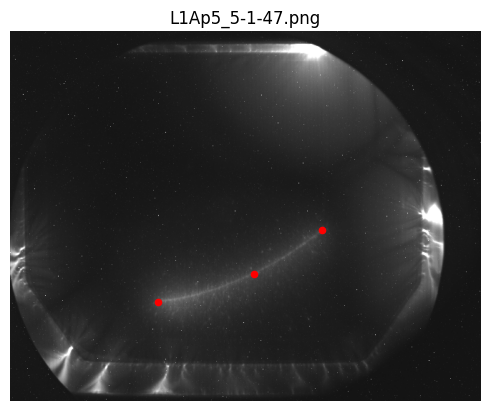

In [31]:
img = view_random_image_labels(target_dir = data_path,
                        target_folder="/Train",
                        labels_df = annotations_df)

we have 4 tracks
Image shape: (517, 658, 4)


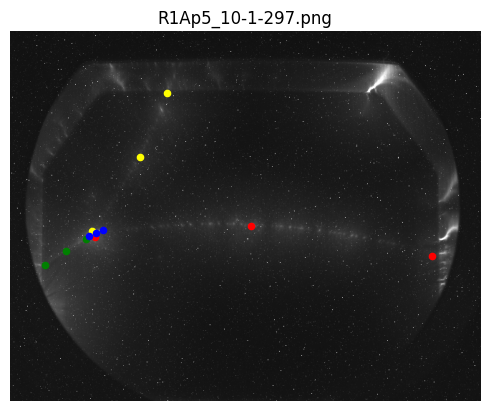

In [32]:
img = view_random_image_labels(target_dir = data_path,
                        target_folder="/Test",
                        labels_df = annotations_df)

we have 3 tracks
Image shape: (517, 658, 4)


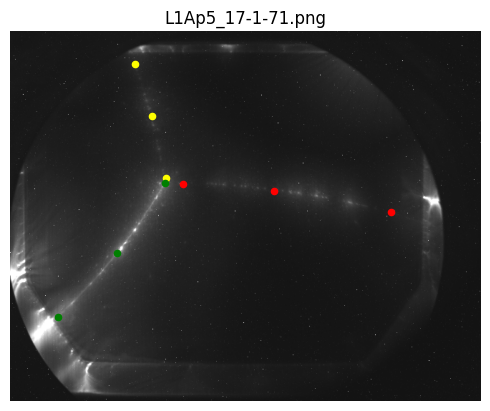

In [33]:
img = view_random_image_labels(target_dir = data_path,
                        target_folder="/Val",
                        labels_df = annotations_df)

# Transform the dataset

In the Coco dataset format the bounding box bbox is defined in the following format: `[x, y , width, height]`
* x: x of the upper most and left most point starting from the left of the image to the right
* y: y of the upper most and left most point starting from the top of the image to the buttom
* width: width to the right
* height: height down

I will also need the image annotations where we applied the transfornations from the previous thesis in section:
**4.1.2 Generation of the Ground Truth**

## Fixing problems in the data and matching them with the masks of each track

In [34]:
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Traccia2,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Traccia3,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val
4,1,L1Ap5_1-1-142.png,Traccia3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val
...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Traccia2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train
3045,998,R1Ap5_9-1-80.png,Traccia3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train
3046,999,R1Ap5_9-1-81.png,Traccia1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train
3047,999,R1Ap5_9-1-81.png,Traccia2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train


We need to fix the track column:
* First we need to make sure that the tracks all start from 1 and have no missing numbers
* Check whether the tracks are consecutive for each image
* Check whether the tracks match with the ground truth data

### Checking the number of tracks and fixing them

In [35]:
lst = []
for i in annotations_df.track:
  lst.append(int(i[-1]))

for i in range(1, len(lst)):
  if lst[i] == 1:
    continue
  else:
    if lst[i] == lst[i-1] + 1:
      continue
    else:
      print(f"error at index {i}")

error at index 98
error at index 151
error at index 168
error at index 218
error at index 237
error at index 311
error at index 313
error at index 374
error at index 405
error at index 441
error at index 541
error at index 1402
error at index 1404
error at index 1697
error at index 1854
error at index 1857
error at index 2351


In [36]:
annotations_df.iloc[:4,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Traccia2,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Traccia3,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val


In image 	L1Ap5_1-1-109.png we do not have track1

In [37]:
annotations_df.loc[0, "track"] = "Traccia1"
annotations_df.loc[1, "track"] = "Traccia2"
annotations_df.iloc[:4,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Traccia1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Traccia2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Traccia1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Traccia2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val


In [38]:
annotations_df.iloc[97:102,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
97,30,L1Ap5_11-1-151.png,Traccia5,0,381.28,262.45,371.56,248.47,377.63,255.16,Val
98,31,L1Ap5_11-1-182.png,Traccia2,0,490.63,262.45,468.15,170.71,446.28,55.28,Test
99,31,L1Ap5_11-1-182.png,Traccia3,0,482.73,267.91,275.57,311.05,106.07,319.55,Test
100,32,L1Ap5_11-1-224.png,Traccia1,0,477.87,269.74,381.88,258.80,273.14,252.73,Train
101,32,L1Ap5_11-1-224.png,Traccia2,0,272.53,245.44,313.23,137.90,341.79,57.71,Train


In image L1Ap5_11-1-182.png	we do not have track1

In [39]:
annotations_df.loc[98, "track"] = "Traccia1"
annotations_df.loc[99, "track"] = "Traccia2"
annotations_df.iloc[97:102,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
97,30,L1Ap5_11-1-151.png,Traccia5,0,381.28,262.45,371.56,248.47,377.63,255.16,Val
98,31,L1Ap5_11-1-182.png,Traccia1,0,490.63,262.45,468.15,170.71,446.28,55.28,Test
99,31,L1Ap5_11-1-182.png,Traccia2,0,482.73,267.91,275.57,311.05,106.07,319.55,Test
100,32,L1Ap5_11-1-224.png,Traccia1,0,477.87,269.74,381.88,258.80,273.14,252.73,Train
101,32,L1Ap5_11-1-224.png,Traccia2,0,272.53,245.44,313.23,137.90,341.79,57.71,Train


In [40]:
annotations_df.iloc[150:156,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
150,49,L1Ap5_13-1-20.png,Traccia2,0,418.34,343.25,438.38,212.63,472.40,100.24,Train
151,50,L1Ap5_13-1-21.png,Traccia2,0,315.70,219.03,272.69,146.13,233.32,75.34,Train
152,50,L1Ap5_13-1-21.png,Traccia3,0,306.95,224.14,249.36,251.11,165.52,285.30,Train
153,51,L1Ap5_13-1-224.png,Traccia1,0,565.36,273.38,421.37,241.79,281.64,230.85,Train
154,51,L1Ap5_13-1-224.png,Traccia2,0,262.81,223.56,320.52,138.51,403.15,34.63,Train
155,52,L1Ap5_13-1-61.png,Traccia1,0,521.61,272.17,392.82,260.62,325.93,260.62,Train


In image L1Ap5_13-1-21.png we do not have track1

In [41]:
annotations_df.loc[151, "track"] = "Traccia1"
annotations_df.loc[152, "track"] = "Traccia2"
annotations_df.iloc[150:156,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
150,49,L1Ap5_13-1-20.png,Traccia2,0,418.34,343.25,438.38,212.63,472.40,100.24,Train
151,50,L1Ap5_13-1-21.png,Traccia1,0,315.70,219.03,272.69,146.13,233.32,75.34,Train
152,50,L1Ap5_13-1-21.png,Traccia2,0,306.95,224.14,249.36,251.11,165.52,285.30,Train
153,51,L1Ap5_13-1-224.png,Traccia1,0,565.36,273.38,421.37,241.79,281.64,230.85,Train
154,51,L1Ap5_13-1-224.png,Traccia2,0,262.81,223.56,320.52,138.51,403.15,34.63,Train
155,52,L1Ap5_13-1-61.png,Traccia1,0,521.61,272.17,392.82,260.62,325.93,260.62,Train


In [42]:
annotations_df.iloc[167:172,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
167,57,L1Ap5_14-1-101.png,Traccia3,0,276.78,219.92,266.46,199.26,259.17,176.79,Val
168,58,L1Ap5_14-1-140.png,Traccia2,0,432.31,226.60,322.95,122.72,206.31,38.88,Train
169,58,L1Ap5_14-1-140.png,Traccia3,0,434.74,232.68,417.73,256.98,399.50,281.89,Train
170,59,L1Ap5_14-1-192.png,Traccia1,0,560.50,260.62,423.20,232.07,301.63,220.53,Train
171,59,L1Ap5_14-1-192.png,Traccia2,0,261.59,208.98,219.07,128.18,160.75,40.70,Train


In image L1Ap5_14-1-140.png we do not have track1

In [43]:
annotations_df.loc[168, "track"] = "Traccia1"
annotations_df.loc[169, "track"] = "Traccia2"
annotations_df.iloc[167:172,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
167,57,L1Ap5_14-1-101.png,Traccia3,0,276.78,219.92,266.46,199.26,259.17,176.79,Val
168,58,L1Ap5_14-1-140.png,Traccia1,0,432.31,226.60,322.95,122.72,206.31,38.88,Train
169,58,L1Ap5_14-1-140.png,Traccia2,0,434.74,232.68,417.73,256.98,399.50,281.89,Train
170,59,L1Ap5_14-1-192.png,Traccia1,0,560.50,260.62,423.20,232.07,301.63,220.53,Train
171,59,L1Ap5_14-1-192.png,Traccia2,0,261.59,208.98,219.07,128.18,160.75,40.70,Train


In [44]:
annotations_df.iloc[217:223,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
217,74,L1Ap5_15-1-292.png,Traccia5,0,112.75,212.63,119.44,207.16,129.76,201.09,Train
218,75,L1Ap5_15-1-298.png,Traccia2,0,521.01,274.60,360.62,137.30,185.05,32.20,Train
219,75,L1Ap5_15-1-298.png,Traccia3,0,519.79,278.24,508.86,293.43,495.49,309.22,Train
220,76,L1Ap5_16-1-107.png,Traccia1,0,569.61,286.14,480.30,274.60,392.21,268.52,Train
221,76,L1Ap5_16-1-107.png,Traccia2,0,347.26,259.41,216.03,182.86,123.69,157.95,Train
222,76,L1Ap5_16-1-107.png,Traccia3,0,92.10,148.23,119.44,94.16,152.24,39.49,Train


In image L1Ap5_15-1-298.png we do not have track1

In [45]:
annotations_df.loc[218, "track"] = "Traccia1"
annotations_df.loc[219, "track"] = "Traccia2"
annotations_df.iloc[217:223,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
217,74,L1Ap5_15-1-292.png,Traccia5,0,112.75,212.63,119.44,207.16,129.76,201.09,Train
218,75,L1Ap5_15-1-298.png,Traccia1,0,521.01,274.60,360.62,137.30,185.05,32.20,Train
219,75,L1Ap5_15-1-298.png,Traccia2,0,519.79,278.24,508.86,293.43,495.49,309.22,Train
220,76,L1Ap5_16-1-107.png,Traccia1,0,569.61,286.14,480.30,274.60,392.21,268.52,Train
221,76,L1Ap5_16-1-107.png,Traccia2,0,347.26,259.41,216.03,182.86,123.69,157.95,Train
222,76,L1Ap5_16-1-107.png,Traccia3,0,92.10,148.23,119.44,94.16,152.24,39.49,Train


In [46]:
annotations_df.iloc[236:242,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
236,80,L1Ap5_16-1-244.png,Traccia6,0,144.34,138.51,163.18,133.65,195.38,129.40,Train
237,81,L1Ap5_16-1-25.png,Traccia2,0,325.38,202.91,338.75,193.19,355.70,184.68,Train
238,81,L1Ap5_16-1-25.png,Traccia3,0,323.56,212.63,346.04,202.91,380.67,193.19,Train
239,81,L1Ap5_16-1-25.png,Traccia4,0,318.70,213.24,219.68,215.67,147.99,203.52,Train
240,82,L1Ap5_16-1-282.png,Traccia1,0,547.13,318.95,447.50,314.08,374.59,315.91,Train
241,82,L1Ap5_16-1-282.png,Traccia2,0,327.81,302.54,283.47,183.47,256.74,38.27,Train


In image L1Ap5_16-1-25.png we do not have track1

In [47]:
annotations_df.loc[237, "track"] = "Traccia1"
annotations_df.loc[238, "track"] = "Traccia2"
annotations_df.loc[239, "track"] = "Traccia3"
annotations_df.iloc[236:242,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
236,80,L1Ap5_16-1-244.png,Traccia6,0,144.34,138.51,163.18,133.65,195.38,129.40,Train
237,81,L1Ap5_16-1-25.png,Traccia1,0,325.38,202.91,338.75,193.19,355.70,184.68,Train
238,81,L1Ap5_16-1-25.png,Traccia2,0,323.56,212.63,346.04,202.91,380.67,193.19,Train
239,81,L1Ap5_16-1-25.png,Traccia3,0,318.70,213.24,219.68,215.67,147.99,203.52,Train
240,82,L1Ap5_16-1-282.png,Traccia1,0,547.13,318.95,447.50,314.08,374.59,315.91,Train
241,82,L1Ap5_16-1-282.png,Traccia2,0,327.81,302.54,283.47,183.47,256.74,38.27,Train


In [48]:
annotations_df.iloc[310:316,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
310,107,L1Ap5_19-1-166.png,Traccia6,0,456.00,266.09,434.74,240.57,399.50,207.16,Train
311,108,L1Ap5_19-1-187.png,Traccia2,0,497.92,225.39,396.46,119.68,293.19,34.02,Train
312,108,L1Ap5_19-1-187.png,Traccia3,0,499.74,231.46,480.30,252.73,461.47,278.24,Train
313,109,L1Ap5_19-1-222.png,Traccia2,0,429.88,255.16,293.79,140.33,144.95,54.67,Train
314,109,L1Ap5_19-1-222.png,Traccia3,0,434.07,262.45,420.77,280.67,403.69,301.93,Train
315,110,L1Ap5_19-1-240.png,Traccia1,0,541.05,250.29,412.26,221.13,301.63,207.16,Val


In image L1Ap5_19-1-187.png we do not have track1

In [49]:
annotations_df.loc[311, "track"] = "Traccia1"
annotations_df.loc[312, "track"] = "Traccia2"
annotations_df.iloc[310:316,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
310,107,L1Ap5_19-1-166.png,Traccia6,0,456.00,266.09,434.74,240.57,399.50,207.16,Train
311,108,L1Ap5_19-1-187.png,Traccia1,0,497.92,225.39,396.46,119.68,293.19,34.02,Train
312,108,L1Ap5_19-1-187.png,Traccia2,0,499.74,231.46,480.30,252.73,461.47,278.24,Train
313,109,L1Ap5_19-1-222.png,Traccia2,0,429.88,255.16,293.79,140.33,144.95,54.67,Train
314,109,L1Ap5_19-1-222.png,Traccia3,0,434.07,262.45,420.77,280.67,403.69,301.93,Train
315,110,L1Ap5_19-1-240.png,Traccia1,0,541.05,250.29,412.26,221.13,301.63,207.16,Val


In [50]:
annotations_df.iloc[312:318,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
312,108,L1Ap5_19-1-187.png,Traccia2,0,499.74,231.46,480.30,252.73,461.47,278.24,Train
313,109,L1Ap5_19-1-222.png,Traccia2,0,429.88,255.16,293.79,140.33,144.95,54.67,Train
314,109,L1Ap5_19-1-222.png,Traccia3,0,434.07,262.45,420.77,280.67,403.69,301.93,Train
315,110,L1Ap5_19-1-240.png,Traccia1,0,541.05,250.29,412.26,221.13,301.63,207.16,Val
316,110,L1Ap5_19-1-240.png,Traccia2,0,298.05,196.23,310.80,124.54,319.86,34.02,Val
317,110,L1Ap5_19-1-240.png,Traccia3,0,295.01,208.38,190.52,269.74,62.33,318.34,Val


In image L1Ap5_19-1-222.png we do not have track1

In [51]:
annotations_df.loc[313, "track"] = "Traccia1"
annotations_df.loc[314, "track"] = "Traccia2"
annotations_df.iloc[312:318,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
312,108,L1Ap5_19-1-187.png,Traccia2,0,499.74,231.46,480.30,252.73,461.47,278.24,Train
313,109,L1Ap5_19-1-222.png,Traccia1,0,429.88,255.16,293.79,140.33,144.95,54.67,Train
314,109,L1Ap5_19-1-222.png,Traccia2,0,434.07,262.45,420.77,280.67,403.69,301.93,Train
315,110,L1Ap5_19-1-240.png,Traccia1,0,541.05,250.29,412.26,221.13,301.63,207.16,Val
316,110,L1Ap5_19-1-240.png,Traccia2,0,298.05,196.23,310.80,124.54,319.86,34.02,Val
317,110,L1Ap5_19-1-240.png,Traccia3,0,295.01,208.38,190.52,269.74,62.33,318.34,Val


In [52]:
annotations_df.iloc[373:379,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
373,130,L1Ap5_20-1-251.png,Traccia3,0,319.86,268.52,230.00,160.38,154.67,54.67,Train
374,131,L1Ap5_20-1-297.png,Traccia2,0,417.53,280.71,413.16,261.46,407.03,223.84,Train
375,132,L1Ap5_20-1-68.png,Traccia1,0,563.53,245.44,470.58,218.10,369.13,201.09,Val
376,132,L1Ap5_20-1-68.png,Traccia2,0,371.56,188.94,418.34,136.69,457.22,82.01,Val
377,132,L1Ap5_20-1-68.png,Traccia3,0,360.01,199.26,214.82,199.26,81.77,187.72,Val
378,132,L1Ap5_20-1-68.png,Traccia4,0,365.48,205.34,369.13,235.11,367.85,281.89,Val


In image L1Ap5_20-1-297.png we do not have track1

In [53]:
annotations_df.loc[374, "track"] = "Traccia1"
annotations_df.iloc[373:379,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
373,130,L1Ap5_20-1-251.png,Traccia3,0,319.86,268.52,230.00,160.38,154.67,54.67,Train
374,131,L1Ap5_20-1-297.png,Traccia1,0,417.53,280.71,413.16,261.46,407.03,223.84,Train
375,132,L1Ap5_20-1-68.png,Traccia1,0,563.53,245.44,470.58,218.10,369.13,201.09,Val
376,132,L1Ap5_20-1-68.png,Traccia2,0,371.56,188.94,418.34,136.69,457.22,82.01,Val
377,132,L1Ap5_20-1-68.png,Traccia3,0,360.01,199.26,214.82,199.26,81.77,187.72,Val
378,132,L1Ap5_20-1-68.png,Traccia4,0,365.48,205.34,369.13,235.11,367.85,281.89,Val


In [54]:
annotations_df.iloc[404:410,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
404,144,L1Ap5_22-1-246.png,Traccia3,0,474.83,221.74,337.54,122.11,229.34,30.98,Train
405,145,L1Ap5_22-1-274.png,Traccia2,0,438.38,242.40,431.09,133.65,411.05,31.59,Train
406,145,L1Ap5_22-1-274.png,Traccia3,0,425.02,256.37,270.71,345.68,144.34,396.10,Train
407,145,L1Ap5_22-1-274.png,Traccia4,0,440.81,249.08,411.05,253.94,381.88,256.98,Train
408,145,L1Ap5_22-1-274.png,Traccia5,0,421.37,231.46,407.40,241.79,383.71,253.94,Train
409,146,L1Ap5_22-1-283.png,Traccia1,0,297.96,253.24,359.14,258.73,442.67,262.52,Train


In image L1Ap5_22-1-274.png we do not have track1

In [55]:
annotations_df.loc[405, "track"] = "Traccia1"
annotations_df.loc[406, "track"] = "Traccia2"
annotations_df.loc[407, "track"] = "Traccia3"
annotations_df.loc[408, "track"] = "Traccia4"
annotations_df.iloc[404:410,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
404,144,L1Ap5_22-1-246.png,Traccia3,0,474.83,221.74,337.54,122.11,229.34,30.98,Train
405,145,L1Ap5_22-1-274.png,Traccia1,0,438.38,242.40,431.09,133.65,411.05,31.59,Train
406,145,L1Ap5_22-1-274.png,Traccia2,0,425.02,256.37,270.71,345.68,144.34,396.10,Train
407,145,L1Ap5_22-1-274.png,Traccia3,0,440.81,249.08,411.05,253.94,381.88,256.98,Train
408,145,L1Ap5_22-1-274.png,Traccia4,0,421.37,231.46,407.40,241.79,383.71,253.94,Train
409,146,L1Ap5_22-1-283.png,Traccia1,0,297.96,253.24,359.14,258.73,442.67,262.52,Train


In [56]:
annotations_df.iloc[440:446,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
440,157,L1Ap5_23-1-67.png,Traccia2,0,446.47,215.81,349.20,242.76,249.59,263.27,Train
441,158,L1Ap5_23-1-75.png,Traccia2,0,503.86,227.49,389.41,116.68,289.53,35.76,Train
442,158,L1Ap5_23-1-75.png,Traccia3,0,501.67,234.78,486.37,254.46,469.60,273.42,Train
443,159,L1Ap5_24-1-142.png,Traccia1,0,572.65,267.91,350.29,222.96,135.23,219.92,Train
444,159,L1Ap5_24-1-142.png,Traccia2,0,130.98,217.49,144.95,123.93,147.99,57.71,Train
445,159,L1Ap5_24-1-142.png,Traccia3,0,127.27,219.92,86.02,202.91,35.60,175.57,Train


In image L1Ap5_23-1-75.png we do not have track1

In [57]:
annotations_df.loc[441, "track"] = "Traccia1"
annotations_df.loc[442, "track"] = "Traccia2"
annotations_df.iloc[440:446,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
440,157,L1Ap5_23-1-67.png,Traccia2,0,446.47,215.81,349.20,242.76,249.59,263.27,Train
441,158,L1Ap5_23-1-75.png,Traccia1,0,503.86,227.49,389.41,116.68,289.53,35.76,Train
442,158,L1Ap5_23-1-75.png,Traccia2,0,501.67,234.78,486.37,254.46,469.60,273.42,Train
443,159,L1Ap5_24-1-142.png,Traccia1,0,572.65,267.91,350.29,222.96,135.23,219.92,Train
444,159,L1Ap5_24-1-142.png,Traccia2,0,130.98,217.49,144.95,123.93,147.99,57.71,Train
445,159,L1Ap5_24-1-142.png,Traccia3,0,127.27,219.92,86.02,202.91,35.60,175.57,Train


In [58]:
annotations_df.iloc[540:546,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
540,193,L1Ap5_27-1-256.png,Traccia6,0,217.37,312.75,215.55,318.82,212.51,331.58,Train
541,194,L1Ap5_27-1-258.png,Traccia2,0,361.27,218.86,264.98,126.85,195.43,36.97,Test
542,194,L1Ap5_27-1-258.png,Traccia3,0,371.64,231.09,426.13,270.10,483.10,321.49,Test
543,194,L1Ap5_27-1-258.png,Traccia4,0,355.99,236.52,217.79,327.46,98.32,433.56,Test
544,195,L1Ap5_27-1-269.png,Traccia1,0,539.84,243.61,318.70,221.13,201.51,230.19,Train
545,195,L1Ap5_27-1-269.png,Traccia2,0,136.45,218.58,125.51,128.67,115.18,80.68,Train


In image L1Ap5_27-1-258.png we do not have track1

In [59]:
annotations_df.loc[541, "track"] = "Traccia1"
annotations_df.loc[542, "track"] = "Traccia2"
annotations_df.loc[543, "track"] = "Traccia3"
annotations_df.iloc[540:546,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
540,193,L1Ap5_27-1-256.png,Traccia6,0,217.37,312.75,215.55,318.82,212.51,331.58,Train
541,194,L1Ap5_27-1-258.png,Traccia1,0,361.27,218.86,264.98,126.85,195.43,36.97,Test
542,194,L1Ap5_27-1-258.png,Traccia2,0,371.64,231.09,426.13,270.10,483.10,321.49,Test
543,194,L1Ap5_27-1-258.png,Traccia3,0,355.99,236.52,217.79,327.46,98.32,433.56,Test
544,195,L1Ap5_27-1-269.png,Traccia1,0,539.84,243.61,318.70,221.13,201.51,230.19,Train
545,195,L1Ap5_27-1-269.png,Traccia2,0,136.45,218.58,125.51,128.67,115.18,80.68,Train


In [60]:
# Should recheck if the tracks were wrong or just ordered wrong
annotations_df.iloc[1401:1405,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1401,485,L5Jn0_7-0-249.png,Traccia5,0,511.67,85.30,517.99,156.72,570.45,234.46,Train
1402,486,L5Jn0_7-0-261.png,Traccia2,-1,410.60,213.70,404.20,144.80,390.10,66.50,Train
1403,486,L5Jn0_7-0-261.png,Traccia1,0,540.43,246.41,502.92,237.43,430.78,224.61,Train
1404,486,L5Jn0_7-0-261.png,Traccia3,0,401.60,219.20,354.85,210.57,274.05,199.02,Train


In image L5Jn0_7-0-261.png we do not have track1

In [61]:
annotations_df.loc[1402, "track"] = "Traccia1"
annotations_df.iloc[1401:1405,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1401,485,L5Jn0_7-0-249.png,Traccia5,0,511.67,85.30,517.99,156.72,570.45,234.46,Train
1402,486,L5Jn0_7-0-261.png,Traccia1,-1,410.60,213.70,404.20,144.80,390.10,66.50,Train
1403,486,L5Jn0_7-0-261.png,Traccia1,0,540.43,246.41,502.92,237.43,430.78,224.61,Train
1404,486,L5Jn0_7-0-261.png,Traccia3,0,401.60,219.20,354.85,210.57,274.05,199.02,Train


In [62]:
annotations_df.iloc[1401:1409,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1401,485,L5Jn0_7-0-249.png,Traccia5,0,511.67,85.30,517.99,156.72,570.45,234.46,Train
1402,486,L5Jn0_7-0-261.png,Traccia1,-1,410.60,213.70,404.20,144.80,390.10,66.50,Train
1403,486,L5Jn0_7-0-261.png,Traccia1,0,540.43,246.41,502.92,237.43,430.78,224.61,Train
1404,486,L5Jn0_7-0-261.png,Traccia3,0,401.60,219.20,354.85,210.57,274.05,199.02,Train
1405,486,L5Jn0_7-0-261.png,Traccia4,0,408.04,228.24,371.10,348.30,348.80,424.90,Train
1406,487,L5Jn0_8-1-159.png,Traccia1,0,550.94,270.04,424.62,240.12,171.97,222.39,Train
1407,487,L5Jn0_8-1-159.png,Traccia2,0,180.90,217.00,328.30,135.30,419.80,51.10,Train
1408,487,L5Jn0_8-1-159.png,Traccia3,0,145.20,225.80,80.20,239.80,50.60,247.40,Train


In image 5Jn0_7-0-261.png we do not have track2

In [63]:
annotations_df.loc[1403, "track"] = "Traccia2"
annotations_df.iloc[1401:1409,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1401,485,L5Jn0_7-0-249.png,Traccia5,0,511.67,85.30,517.99,156.72,570.45,234.46,Train
1402,486,L5Jn0_7-0-261.png,Traccia1,-1,410.60,213.70,404.20,144.80,390.10,66.50,Train
1403,486,L5Jn0_7-0-261.png,Traccia2,0,540.43,246.41,502.92,237.43,430.78,224.61,Train
1404,486,L5Jn0_7-0-261.png,Traccia3,0,401.60,219.20,354.85,210.57,274.05,199.02,Train
1405,486,L5Jn0_7-0-261.png,Traccia4,0,408.04,228.24,371.10,348.30,348.80,424.90,Train
1406,487,L5Jn0_8-1-159.png,Traccia1,0,550.94,270.04,424.62,240.12,171.97,222.39,Train
1407,487,L5Jn0_8-1-159.png,Traccia2,0,180.90,217.00,328.30,135.30,419.80,51.10,Train
1408,487,L5Jn0_8-1-159.png,Traccia3,0,145.20,225.80,80.20,239.80,50.60,247.40,Train


In [64]:
# here we have no error it is just a matter that we have 10 traces and it is a bug in the code I wrote so ignore it
annotations_df.iloc[1696:1699,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1696,553,L6Jn0_11-1-16.png,Traccia9,0,452.10,125.17,517.41,118.36,510.60,190.47,Train
1697,553,L6Jn0_11-1-16.png,Traccia10,0,386.80,190.47,407.20,208.84,424.89,223.80,Train
1698,554,L6Jn0_11-1-210.png,Traccia1,0,571.83,268.70,495.64,248.29,426.25,234.69,Test


In [65]:
annotations_df.iloc[1848:1859,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1848,588,L6Jn0_14-1-51.png,Traccia5,0,334.70,213.61,228.50,285.00,71.78,405.11,Train
1849,589,L6Jn0_14-1-53.png,Traccia1,0,543.91,223.09,327.75,182.01,55.35,197.81,Train
1850,589,L6Jn0_14-1-53.png,Traccia2,0,542.64,260.38,320.17,221.19,38.91,236.99,Train
1851,589,L6Jn0_14-1-53.png,Traccia3,0,545.17,281.87,433.90,259.80,269.60,242.00,Train
1852,589,L6Jn0_14-1-53.png,Traccia4,0,253.80,242.05,145.09,245.21,28.80,259.74,Train
1853,589,L6Jn0_14-1-53.png,Traccia5,0,258.23,244.58,256.33,250.90,255.07,254.69,Train
1854,589,L6Jn0_14-1-53.png,Traccia7,0,248.12,257.85,203.87,281.87,140.67,318.52,Train
1855,589,L6Jn0_14-1-53.png,Traccia8,0,251.28,262.90,233.58,331.16,244.96,419.02,Train
1856,589,L6Jn0_14-1-53.png,Traccia9,0,543.91,369.72,457.95,228.14,489.55,89.10,Train
1857,589,L6Jn0_14-1-53.png,Traccia10,0,270.24,147.24,268.97,92.26,265.18,37.27,Train


In image L6Jn0_14-1-53.png we do not have track6

In [66]:
annotations_df.loc[1854, "track"] = "Traccia6"
annotations_df.loc[1855, "track"] = "Traccia7"
annotations_df.loc[1856, "track"] = "Traccia8"
annotations_df.loc[1857, "track"] = "Traccia9"
annotations_df.iloc[1848:1859,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1848,588,L6Jn0_14-1-51.png,Traccia5,0,334.70,213.61,228.50,285.00,71.78,405.11,Train
1849,589,L6Jn0_14-1-53.png,Traccia1,0,543.91,223.09,327.75,182.01,55.35,197.81,Train
1850,589,L6Jn0_14-1-53.png,Traccia2,0,542.64,260.38,320.17,221.19,38.91,236.99,Train
1851,589,L6Jn0_14-1-53.png,Traccia3,0,545.17,281.87,433.90,259.80,269.60,242.00,Train
1852,589,L6Jn0_14-1-53.png,Traccia4,0,253.80,242.05,145.09,245.21,28.80,259.74,Train
1853,589,L6Jn0_14-1-53.png,Traccia5,0,258.23,244.58,256.33,250.90,255.07,254.69,Train
1854,589,L6Jn0_14-1-53.png,Traccia6,0,248.12,257.85,203.87,281.87,140.67,318.52,Train
1855,589,L6Jn0_14-1-53.png,Traccia7,0,251.28,262.90,233.58,331.16,244.96,419.02,Train
1856,589,L6Jn0_14-1-53.png,Traccia8,0,543.91,369.72,457.95,228.14,489.55,89.10,Train
1857,589,L6Jn0_14-1-53.png,Traccia9,0,270.24,147.24,268.97,92.26,265.18,37.27,Train


In [67]:
# here we have no error it is just a matter that we have 10 traces and it is a bug in the code I wrote so ignore it
annotations_df.iloc[1856:1859,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1856,589,L6Jn0_14-1-53.png,Traccia8,0,543.91,369.72,457.95,228.14,489.55,89.10,Train
1857,589,L6Jn0_14-1-53.png,Traccia9,0,270.24,147.24,268.97,92.26,265.18,37.27,Train
1858,590,L6Jn0_14-1-69.png,Traccia1,0,543.91,255.32,450.36,251.53,370.10,261.64,Train


In [68]:
annotations_df.iloc[2349:2356,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
2349,729,R1Ap5_15-1-102.png,Traccia2,0,155.84,223.09,119.81,264.80,81.89,302.09,Test
2350,730,R1Ap5_15-1-137.png,Traccia1,0,374.52,247.10,280.98,170.00,193.76,90.36,Train
2351,730,R1Ap5_15-1-137.png,Traccia3,0,372.62,253.42,272.76,352.02,123.61,439.24,Train
2352,730,R1Ap5_15-1-137.png,Traccia4,0,380.21,254.06,480.70,305.88,579.93,338.75,Train
2353,731,R1Ap5_15-1-140.png,Traccia1,0,452.26,237.62,327.12,158.62,171.60,91.00,Train
2354,731,R1Ap5_15-1-140.png,Traccia2,0,456.68,243.31,451.00,254.69,442.78,265.43,Train
2355,732,R1Ap5_15-1-153.png,Traccia1,0,586.25,311.57,451.63,282.50,331.54,272.39,Train


In image R1Ap5_15-1-137.png we do not have track2

In [69]:
annotations_df.loc[2351, "track"] = "Traccia2"
annotations_df.loc[2352, "track"] = "Traccia3"
annotations_df.iloc[2349:2356,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
2349,729,R1Ap5_15-1-102.png,Traccia2,0,155.84,223.09,119.81,264.80,81.89,302.09,Test
2350,730,R1Ap5_15-1-137.png,Traccia1,0,374.52,247.10,280.98,170.00,193.76,90.36,Train
2351,730,R1Ap5_15-1-137.png,Traccia2,0,372.62,253.42,272.76,352.02,123.61,439.24,Train
2352,730,R1Ap5_15-1-137.png,Traccia3,0,380.21,254.06,480.70,305.88,579.93,338.75,Train
2353,731,R1Ap5_15-1-140.png,Traccia1,0,452.26,237.62,327.12,158.62,171.60,91.00,Train
2354,731,R1Ap5_15-1-140.png,Traccia2,0,456.68,243.31,451.00,254.69,442.78,265.43,Train
2355,732,R1Ap5_15-1-153.png,Traccia1,0,586.25,311.57,451.63,282.50,331.54,272.39,Train


In [70]:
lst = []
for i in annotations_df.track:
  lst.append(int(i[-1]))

for i in range(1, len(lst)):
  if lst[i] == 1:
    if lst[i-1] == 1 and annotations_df.id[i] == annotations_df.id[i-1]:
      print(f"check data at {i}")
    continue
  else:
    if lst[i] == lst[i-1] + 1:
      continue
    else:
      print(f"error at index {i}")

error at index 1697
check data at 1710


at 1697 the error is due to a bug in the code just ignore it

In [71]:
annotations_df.iloc[1708:1715,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1708,556,L6Jn0_11-1-227.png,Traccia2,0,267.75,250.33,294.28,149.66,316.73,34.69,Train
1709,557,L6Jn0_11-1-230.png,Traccia1,0,541.90,243.53,541.90,243.53,453.50,224.50,Train
1710,557,L6Jn0_11-1-230.png,Traccia1,0,449.38,220.40,333.05,204.08,547.34,243.53,Train
1711,557,L6Jn0_11-1-230.png,Traccia2,0,533.05,310.20,418.77,259.18,338.50,210.88,Train
1712,557,L6Jn0_11-1-230.png,Traccia3,0,323.53,202.72,162.31,204.76,54.15,217.68,Train
1713,558,L6Jn0_12-1-1.png,Traccia1,0,540.54,257.82,401.76,229.93,301.76,220.40,Train
1714,558,L6Jn0_12-1-1.png,Traccia2,0,286.80,219.72,172.51,215.64,60.27,223.12,Train


In image L6Jn0_11-1-230.png we  have track1 duplicated

In [72]:
annotations_df.loc[1710, "track"] = "Traccia2"
annotations_df.loc[1711, "track"] = "Traccia3"
annotations_df.loc[1712, "track"] = "Traccia4"
annotations_df.iloc[1708:1715,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
1708,556,L6Jn0_11-1-227.png,Traccia2,0,267.75,250.33,294.28,149.66,316.73,34.69,Train
1709,557,L6Jn0_11-1-230.png,Traccia1,0,541.90,243.53,541.90,243.53,453.50,224.50,Train
1710,557,L6Jn0_11-1-230.png,Traccia2,0,449.38,220.40,333.05,204.08,547.34,243.53,Train
1711,557,L6Jn0_11-1-230.png,Traccia3,0,533.05,310.20,418.77,259.18,338.50,210.88,Train
1712,557,L6Jn0_11-1-230.png,Traccia4,0,323.53,202.72,162.31,204.76,54.15,217.68,Train
1713,558,L6Jn0_12-1-1.png,Traccia1,0,540.54,257.82,401.76,229.93,301.76,220.40,Train
1714,558,L6Jn0_12-1-1.png,Traccia2,0,286.80,219.72,172.51,215.64,60.27,223.12,Train


In [73]:
lst = []
for i in annotations_df.track:
  lst.append(int(i[-1]))

for i in range(1, len(lst)):
  if lst[i] == 1:
    if lst[i-1] == 1 and annotations_df.id[i] == annotations_df.id[i-1]:
      print(f"check data at {i}")
    continue
  else:
    if lst[i] == lst[i-1] + 1:
      continue
    else:
      print(f"error at index {i}")

error at index 1697


### Check whether the tracks match with the ground truth data

#### Check the matching in directories

We have the ground truth data having namings: Trackn where n is the number of the track therefore we need to change that

In [74]:
renaming_dict = {"Traccia1": "Track1", "Traccia2": "Track2", "Traccia3": "Track3", "Traccia4": "Track4", "Traccia5": "Track5",
                 "Traccia6": "Track6", "Traccia7": "Track7", "Traccia8": "Track8", "Traccia9": "Track9", "Traccia10": "Track10",}

In [75]:
for i in range(len(annotations_df)):
  key = annotations_df.loc[i,"track"]
  annotations_df.loc[i,"track"] = renaming_dict[key]
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val
...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train
3045,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train
3046,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train
3047,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train


Now we will do random visualizations of tracks and there corresponding 3 points to see how accurately our data matches with the ground truth and then we will check the previously modified data each on its own to see if we fixed them correctly

In [76]:
# check if all the tracks exist
main_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth"
for i in tqdm(range(len(annotations_df))):
  img_path = os.path.join(main_path, annotations_df.folder[i], annotations_df.name[i][:-4], annotations_df.track[i] + ".png")
  if os.path.exists(img_path):
    continue
  else:
    print(f"{img_path} does not exist")

 15%|█▍        | 453/3049 [00:00<00:01, 2265.74it/s]

/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L1Ap5_10-1-162/Track3.png does not exist


100%|██████████| 3049/3049 [00:01<00:00, 2244.18it/s]


In [77]:
annotations_df[annotations_df.name=="L1Ap5_10-1-162.png"]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
48,15,L1Ap5_10-1-162.png,Track2,0,484.56,247.26,437.78,156.13,369.73,46.78,Train
49,15,L1Ap5_10-1-162.png,Track3,0,481.52,253.94,419.55,312.87,353.33,350.54,Train


In [78]:
annotations_df.iloc[47:53,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
47,14,L1Ap5_10-1-159.png,Track1,0,490.63,277.63,267.67,339.60,87.24,341.42,Train
48,15,L1Ap5_10-1-162.png,Track2,0,484.56,247.26,437.78,156.13,369.73,46.78,Train
49,15,L1Ap5_10-1-162.png,Track3,0,481.52,253.94,419.55,312.87,353.33,350.54,Train
50,16,L1Ap5_10-1-164.png,Track1,0,556.24,284.92,329.64,250.90,216.03,253.33,Train
51,16,L1Ap5_10-1-164.png,Track2,0,210.56,247.26,183.23,143.98,147.99,57.71,Train
52,16,L1Ap5_10-1-164.png,Track3,0,209.35,252.12,200.24,249.08,189.30,242.40,Train


Here we have track 1 missing we will quickly fix that and recheck again

In [79]:
annotations_df.loc[48,"track"] = "Track1"
annotations_df.loc[49,"track"] = "Track2"
annotations_df.iloc[47:53,:]

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
47,14,L1Ap5_10-1-159.png,Track1,0,490.63,277.63,267.67,339.60,87.24,341.42,Train
48,15,L1Ap5_10-1-162.png,Track1,0,484.56,247.26,437.78,156.13,369.73,46.78,Train
49,15,L1Ap5_10-1-162.png,Track2,0,481.52,253.94,419.55,312.87,353.33,350.54,Train
50,16,L1Ap5_10-1-164.png,Track1,0,556.24,284.92,329.64,250.90,216.03,253.33,Train
51,16,L1Ap5_10-1-164.png,Track2,0,210.56,247.26,183.23,143.98,147.99,57.71,Train
52,16,L1Ap5_10-1-164.png,Track3,0,209.35,252.12,200.24,249.08,189.30,242.40,Train


In [80]:
# recheck
main_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth"
for i in tqdm(range(len(annotations_df))):
  img_path = os.path.join(main_path, annotations_df.folder[i], annotations_df.name[i][:-4], annotations_df.track[i] + ".png")
  if os.path.exists(img_path):
    continue
  else:
    print(f"{img_path} does not exist")

100%|██████████| 3049/3049 [00:01<00:00, 2272.18it/s]


Perfect we have till now perfect data we just need now to check whether the masks of each track match the data

#### Check the matching in the masks (visualize each track)

In [81]:
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val
...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train
3045,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train
3046,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train
3047,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train


In [82]:
# random plots
gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth"
def plot_track_gt_points(gt_path, labels_df, scaling_factor = (402/517, 512/658), idx = None, random_plot = True):

  if random:
    idx = random.randint(0, labels_df.shape[0])

  img_path = os.path.join(gt_path, labels_df.folder[idx], labels_df.name[idx][:-4], labels_df.track[idx] + ".png")

  title = os.path.join(labels_df.name[idx], labels_df.track[idx])

  points = labels_df.loc[idx, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = "gray")

  plt.scatter(np.array([points[0], points[2], points[4]])*scaling_factor[1],
              np.array([points[1], points[3], points[5]])*scaling_factor[0], color= "red", s = 20)
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (402, 512)


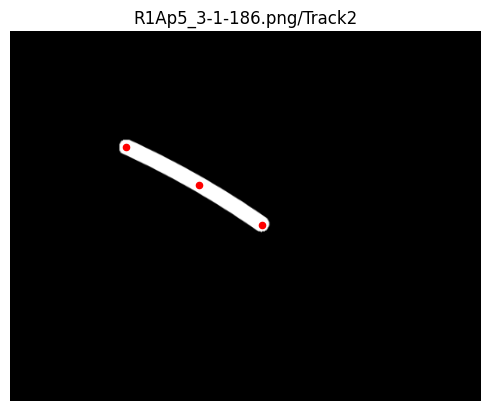

In [83]:
img = plot_track_gt_points(gt_path = gt_path, labels_df = annotations_df)

#### Check the tracks that we changed

* error at index 98
* error at index 151
* error at index 168
* error at index 218
* error at index 237
* error at index 311
* error at index 313
* error at index 374
* error at index 405
* error at index 441
* error at index 541
* error at index 1402
* error at index 1404
* error at index 1697
* error at index 1854
* error at index 1857
* error at index 2351

First we will create a function that takes the image name and then visualized its tracks, set random to false in the previous functon and pass it an index, since we need many visualizations it would make sense to either plot them and delete them instantly or save them

In [84]:
# from IPython.display import clear_output
# indeces = [98, 151, 168, 218, 237, 311, 313, 374, 405, 441, 541, 1402, 1404, 1697, 1854, 1857, 2351]
# indeces_neighbors = []

# for i in indeces:
  # for j in range(-3, 6):
    # indeces_neighbors.append(i+j)

# for i in indeces_neighbors:
  # plt.figure()
  # img = plot_track_gt_points(gt_path = gt_path, labels_df = annotations_df, idx = i, random_plot = False)
  # plt.show()
  # time.sleep(1.5)
  # plt.clf()
  # clear_output()

## Add bounding boxes

In [85]:
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val
...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train
3045,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train
3046,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train
3047,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train


In [86]:
def get_bounding_box(main_dir, img_folder, img_name, img_track, edge = 3, scaling_factor = (402/517, 512/658)):

  img_dir = os.path.join(main_dir, img_folder, img_name[:-4], img_track+".png")
  img = mpimg.imread(img_dir)
  mask = np.where(img>0)
  if len(mask[0]) < 1 or len(mask[1]) < 1:
    return None
  x = (mask[1].min() - edge)/scaling_factor[1]
  y = (img.shape[0] - mask[0].max() - edge)/scaling_factor[0]
  width = (mask[1].max() - mask[1].min() + 2*edge)/scaling_factor[1]
  height = (mask[0].max() - mask[0].min() + 2*edge)/scaling_factor[0]
  return np.array([x, y, width, height], dtype = np.float64)

In [87]:
%%time
bbox1 = annotations_df.iloc[:1000,:].apply(lambda x: get_bounding_box("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth", x.folder, x.loc["name"], x.track), axis = 1)

CPU times: user 2.94 s, sys: 205 ms, total: 3.14 s
Wall time: 6.09 s


In [88]:
%%time
bbox2 = annotations_df.iloc[1000:1500,:].apply(lambda x: get_bounding_box("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth", x.folder, x.loc["name"], x.track), axis = 1)

CPU times: user 1.57 s, sys: 91.4 ms, total: 1.66 s
Wall time: 3.43 s


In [89]:
%%time
bbox3 = annotations_df.iloc[1500:2000,:].apply(lambda x: get_bounding_box("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth", x.folder, x.loc["name"], x.track), axis = 1)

CPU times: user 2 s, sys: 173 ms, total: 2.17 s
Wall time: 1min 21s


In [90]:
%%time
bbox4 = annotations_df.iloc[2000:2500,:].apply(lambda x: get_bounding_box("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth", x.folder, x.loc["name"], x.track), axis = 1)

CPU times: user 1.93 s, sys: 162 ms, total: 2.1 s
Wall time: 1min 14s


In [91]:
%%time
bbox5 = annotations_df.iloc[2500:,:].apply(lambda x: get_bounding_box("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth", x.folder, x.loc["name"], x.track), axis = 1)

CPU times: user 2.73 s, sys: 238 ms, total: 2.97 s
Wall time: 2min 58s


In [92]:
bbox = pd.concat([bbox1, bbox2, bbox3, bbox4, bbox5])

In [93]:
bbox.values

array([array([209.48046875, 254.64179104, 217.19140625, 239.20895522]),
       array([327.71484375, 237.92288557,  93.81640625,  43.72636816]),
       array([427.95703125, 218.6318408 , 151.6484375 ,  48.87064677]),
       ...,
       array([161.9296875 , 232.77860697, 370.125     ,  59.15920398]),
       array([ 89.9609375 , 254.64179104,  83.53515625,  32.15174129]),
       array([131.0859375 , 231.49253731,  42.41015625,  50.15671642])],
      dtype=object)

In [94]:
for i in bbox:
  print(i, i.shape)
  break

[209.48046875 254.64179104 217.19140625 239.20895522] (4,)


In [95]:
bbox[0]

array([209.48046875, 254.64179104, 217.19140625, 239.20895522])

In [96]:
for i in tqdm(range(len(annotations_df))):
  annotations_df.loc[i,["bbox_x", "bbox_y", "bbox_width", "bbox_height"]] = bbox[i]

100%|██████████| 3049/3049 [00:03<00:00, 854.69it/s]


In [97]:
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder,bbox_x,bbox_y,bbox_width,bbox_height
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train,209.480469,254.641791,217.191406,239.208955
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train,327.714844,237.922886,93.816406,43.726368
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val,427.957031,218.631841,151.648438,48.870647
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val,116.949219,279.077114,214.621094,124.748756
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val,332.855469,210.915423,46.265625,66.875622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train,478.078125,239.208955,83.535156,203.199005
3045,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train,388.117188,195.482587,167.070312,65.589552
3046,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train,161.929688,232.778607,370.125000,59.159204
3047,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train,89.960938,254.641791,83.535156,32.151741


In [98]:
annotations_df.dtypes

id              object
name            object
track           object
z_order         object
p1_x           float64
p1_y           float64
p2_x           float64
p2_y           float64
p3_x           float64
p3_y           float64
folder          object
bbox_x         float64
bbox_y         float64
bbox_width     float64
bbox_height    float64
dtype: object

In [99]:
annotations_df = annotations_df.round(2)
annotations_df

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder,bbox_x,bbox_y,bbox_width,bbox_height
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train,209.48,254.64,217.19,239.21
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train,327.71,237.92,93.82,43.73
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val,427.96,218.63,151.65,48.87
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val,116.95,279.08,214.62,124.75
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val,332.86,210.92,46.27,66.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train,478.08,239.21,83.54,203.20
3045,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train,388.12,195.48,167.07,65.59
3046,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train,161.93,232.78,370.12,59.16
3047,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train,89.96,254.64,83.54,32.15


In [100]:
# random plots
gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth"
def plot_track_gt_points_bbx(gt_path, labels_df, scaling_factor = (402/517, 512/658)):
  idx = random.randint(0, labels_df.shape[0])
  img_path = os.path.join(gt_path, labels_df.folder[idx], labels_df.name[idx][:-4], labels_df.track[idx] + ".png")

  title = os.path.join(labels_df.name[idx], labels_df.track[0])

  points = labels_df.loc[idx, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(img_path)
  bbox = labels_df.loc[idx, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]]
  bbox_x = np.array([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]]) * scaling_factor[1]
  bbox_y = np.array([img.shape[0] - bbox[1]*scaling_factor[0], img.shape[0] - bbox[1]*scaling_factor[0],
                     img.shape[0] - bbox[1]*scaling_factor[0]-bbox[3]*scaling_factor[0],
                     img.shape[0] - bbox[1]*scaling_factor[0]-bbox[3]*scaling_factor[0],
                     img.shape[0] - bbox[1]*scaling_factor[0]])
  plt.imshow(img, cmap = "gray")

  plt.scatter(np.array([points[0], points[2], points[4]])*scaling_factor[1],
              np.array([points[1], points[3], points[5]])*scaling_factor[0], color= "red", s = 20)
  plt.plot(bbox_x, bbox_y, color = "red", linewidth = 1)
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (402, 512)


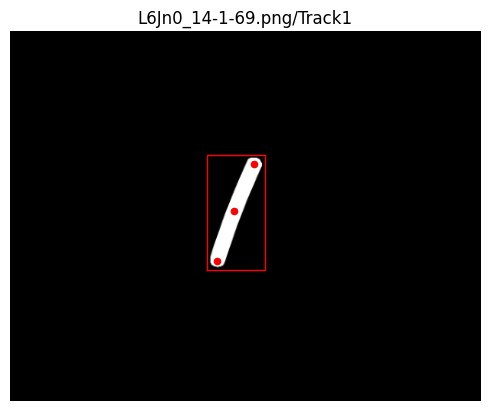

In [101]:
img = plot_track_gt_points_bbx(gt_path = gt_path, labels_df = annotations_df)

## Get segmentation (polygon) masks

In [102]:
def get_segmentation(main_dir, img_folder, img_name, img_track, intensity_threshold = 0, contour_approximation = "none", scaling_factor = (402/517, 512/658)):

  """cv2.CHAIN_APPROX_NONE returns a denser polygon annotation which can be more representative and it should
     be passed as a hyper parameter, cv2.CHAIN_APPROX_SIMPLE is a simpler presentation, we can try both and see the
     performance later on"""

  img_dir = os.path.join(main_dir, img_folder, img_name[:-4], img_track+".png")
  im = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
  assert im is not None, "file could not be read, check with os.path.exists()"
  ret, thresh = cv2.threshold(im, 0, 255, 0)
  if contour_approximation == "simple":
    approx = cv2.CHAIN_APPROX_SIMPLE
  elif contour_approximation == "none":
    approx = cv2.CHAIN_APPROX_NONE
  else:
    approx = cv2.CHAIN_APPROX_NONE
    print("contour_approximation should be either simple or none, but since it was passed wrong the function will use the default value 'none'")
  contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, approx)
  if len(contours) > 1:
    raise Exception("more than one segmentation detected for one track")
  if len(contours) != 1:
    print(f"no contours are detected for this track {img_dir}")
    return None
  contours = contours[0].squeeze()/[scaling_factor[1], scaling_factor[0]]
  contours = np.round(contours, 2)
  segmentations = np.reshape(contours,(contours.shape[0]*contours.shape[1])).tolist()
  return segmentations

In [103]:
%%time
annotations_df.loc[:,"segmentation"] = annotations_df.apply(lambda x: get_segmentation("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth", x.folder, x.loc["name"], x.track), axis = 1)
annotations_df

no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L1Ap5_22-1-36/Track1.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L1Ap5_4-1-289/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L1Ap5_9-1-32/Track3.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Val/L5Jn0_4-1-257/Track5.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L5Jn0_5-1-211/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L6Jn0_10-1-281/Track2.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Val/L6Jn0_13-1-145/Track6.png
no contours are detected for this track /content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Tr

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder,bbox_x,bbox_y,bbox_width,bbox_height,segmentation
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train,209.48,254.64,217.19,239.21,"[217.19, 27.01, 215.91, 28.29, 214.62, 29.58, ..."
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train,327.71,237.92,93.82,43.73,"[399.68, 239.21, 398.4, 240.5, 397.11, 240.5, ..."
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val,427.96,218.63,151.65,48.87,"[435.67, 253.36, 434.38, 254.64, 433.1, 254.64..."
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val,116.95,279.08,214.62,124.75,"[127.23, 117.03, 125.95, 118.32, 124.66, 118.3..."
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val,332.86,210.92,46.27,66.88,"[355.99, 243.07, 354.7, 244.35, 354.7, 245.64,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train,478.08,239.21,83.54,203.20,"[485.79, 78.45, 484.5, 79.74, 483.22, 79.74, 4..."
3045,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train,388.12,195.48,167.07,65.59,"[535.91, 259.79, 534.62, 261.07, 533.34, 261.0..."
3046,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train,161.93,232.78,370.12,59.16,"[224.9, 228.92, 223.62, 230.21, 222.33, 230.21..."
3047,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train,89.96,254.64,83.54,32.15,"[122.09, 234.06, 120.8, 235.35, 119.52, 235.35..."


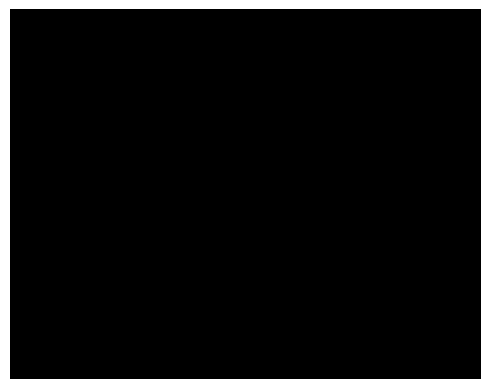

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming you have the correct path to the image
image_path = '/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/Train/L1Ap5_4-1-289/Track2.png'

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img, cmap = "gray")
plt.axis('off') # Hide the axis
plt.show()

In [104]:
annotations_df.isna().sum()

id               0
name             0
track            0
z_order          0
p1_x             0
p1_y             0
p2_x             0
p2_y             0
p3_x             0
p3_y             0
folder           0
bbox_x          14
bbox_y          14
bbox_width      14
bbox_height     14
segmentation    14
dtype: int64

In [113]:
imgs_to_be_dropped = annotations_df.loc[annotations_df.isna().bbox_x, :].name.values
imgs_to_be_dropped

array(['L1Ap5_22-1-36.png', 'L1Ap5_4-1-289.png', 'L1Ap5_9-1-32.png',
       'L5Jn0_4-1-257.png', 'L5Jn0_5-1-211.png', 'L6Jn0_10-1-281.png',
       'L6Jn0_13-1-145.png', 'L6Jn0_8-1-158.png', 'L6Jn0_8-1-159.png',
       'R1Ap5_10-1-12.png', 'R1Ap5_18-1-205.png', 'R1Ap5_23-1-272.png',
       'R1Ap5_28-1-40.png', 'R1Ap5_8-1-21.png'], dtype=object)

In [114]:
annotations_df = annotations_df[~annotations_df['name'].isin(imgs_to_be_dropped)]

In [117]:
annotations_df.reset_index().drop(columns = ["index"])

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder,bbox_x,bbox_y,bbox_width,bbox_height,segmentation
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train,209.48,254.64,217.19,239.21,"[217.19, 27.01, 215.91, 28.29, 214.62, 29.58, ..."
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train,327.71,237.92,93.82,43.73,"[399.68, 239.21, 398.4, 240.5, 397.11, 240.5, ..."
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val,427.96,218.63,151.65,48.87,"[435.67, 253.36, 434.38, 254.64, 433.1, 254.64..."
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val,116.95,279.08,214.62,124.75,"[127.23, 117.03, 125.95, 118.32, 124.66, 118.3..."
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val,332.86,210.92,46.27,66.88,"[355.99, 243.07, 354.7, 244.35, 354.7, 245.64,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,998,R1Ap5_9-1-80.png,Track2,0,545.80,264.17,514.83,177.58,492.08,86.57,Train,478.08,239.21,83.54,203.20,"[485.79, 78.45, 484.5, 79.74, 483.22, 79.74, 4..."
2993,998,R1Ap5_9-1-80.png,Track3,0,541.38,270.49,478.17,288.82,399.80,306.51,Train,388.12,195.48,167.07,65.59,"[535.91, 259.79, 534.62, 261.07, 533.34, 261.0..."
2994,999,R1Ap5_9-1-81.png,Track1,0,519.26,269.22,330.91,239.52,174.17,244.58,Train,161.93,232.78,370.12,59.16,"[224.9, 228.92, 223.62, 230.21, 222.33, 230.21..."
2995,999,R1Ap5_9-1-81.png,Track2,0,160.90,245.21,133.72,244.58,102.12,247.10,Train,89.96,254.64,83.54,32.15,"[122.09, 234.06, 120.8, 235.35, 119.52, 235.35..."


In [129]:
# Step 1: Ensure a unique mapping (optional based on your setup)
# annotations_df = annotations_df.drop_duplicates(subset=['name', 'folder'])

# Step 2: Aggregate the folder values for each name and count occurrences
folder_counts = annotations_df.groupby('name')['folder'].first().value_counts()

# This will give you the count of Train, Test, and Val folders
print(folder_counts)

Train    791
Test      98
Val       97
Name: folder, dtype: int64


In [130]:
def plot_track_gt_points_bbx_segcountours(gt_path, labels_df, scaling_factor = (402/517, 512/658)):
  idx = random.randint(0, labels_df.shape[0])
  img_path = os.path.join(gt_path, labels_df.folder[idx], labels_df.name[idx][:-4], labels_df.track[idx] + ".png")

  title = os.path.join(labels_df.name[idx], labels_df.track[0])

  points = labels_df.loc[idx, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(img_path)
  bbox = labels_df.loc[idx, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]]
  bbox_x = np.array([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]]) * scaling_factor[1]
  bbox_y = np.array([img.shape[0] - bbox[1]*scaling_factor[0], img.shape[0] - bbox[1]*scaling_factor[0],
                     img.shape[0] - bbox[1]*scaling_factor[0]-bbox[3]*scaling_factor[0],
                     img.shape[0] - bbox[1]*scaling_factor[0]-bbox[3]*scaling_factor[0],
                     img.shape[0] - bbox[1]*scaling_factor[0]])

  segmentation = labels_df.loc[idx, "segmentation"].copy()
  x_segmentation = np.array(segmentation[::2])*scaling_factor[1]
  y_segmentation = np.array(segmentation[1::2])*scaling_factor[0]
  plt.imshow(img, cmap = "gray")

  plt.scatter(np.array([points[0], points[2], points[4]])*scaling_factor[1],
              np.array([points[1], points[3], points[5]])*scaling_factor[0], color= "red", s = 20)
  plt.plot(bbox_x, bbox_y, color = "red", linewidth = 1)
  plt.plot(x_segmentation, y_segmentation, color = "red", linewidth = 2)
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (402, 512)


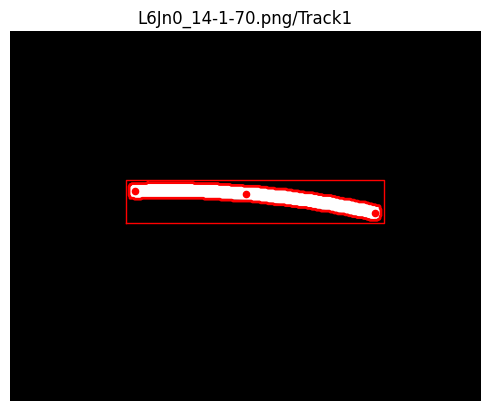

In [131]:
img = plot_track_gt_points_bbx_segcountours(gt_path = gt_path, labels_df = annotations_df)

In [132]:
gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"
def plot_img_points_bbox_segcontour(gt_path, labels_df):
  idx = random.randint(0, labels_df.shape[0])
  img_path = os.path.join(gt_path, labels_df.folder[idx], labels_df.name[idx])
  title = labels_df.name[idx]
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = "gray")
  colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]


  image_name = labels_df.name[idx]
  view = labels_df.name == image_name


  points = labels_df.loc[view, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
  bbox = labels_df.loc[view, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]].values.copy()
  segmentation = labels_df.loc[view, "segmentation"].values.copy()

  for j in range(points.shape[0]):
    plt.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s = 20)
    # plt.scatter(np.array([points[0], points[2], points[4]]), np.array([points[1], points[3], points[5]]), color= "red", s = 2)


    bbox_x = np.array([bbox[j][0], bbox[j][0] + bbox[j][2], bbox[j][0] + bbox[j][2], bbox[j][0], bbox[j][0]])
    bbox_y = np.array([img.shape[0] - bbox[j][1], img.shape[0] - bbox[j][1],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]])
    # bbox_x = np.array([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]])
    # bbox_y = np.array([img.shape[0] - bbox[1], img.shape[0] - bbox[1],
    #                  img.shape[0] - bbox[1]-bbox[3],
    #                  img.shape[0] - bbox[1]-bbox[3],
    #                  img.shape[0] - bbox[1]])
    plt.plot(bbox_x, bbox_y, color = colors[j], linewidth = 0.2)


    x_segmentation = np.array(segmentation[j][::2])
    y_segmentation = np.array(segmentation[j][1::2])
    plt.plot(x_segmentation, y_segmentation, color = colors[j], linewidth = 0.5)


  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (517, 658, 4)


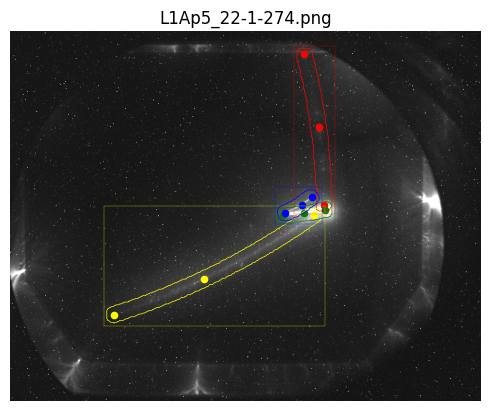

In [133]:
img = plot_img_points_bbox_segcontour(gt_path = gt_path, labels_df = annotations_df)

In [134]:
annotations_df.to_csv("/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/annotations.csv")